#### Charger ce dataset.
#### Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.).

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('worldBank.csv')
print(df.head())

print("Nombre d'observations et de variables ", df.shape)
print("\nTypes des variables ")
print(df.dtypes)
print("\nValeurs manquantes")
print(df.isnull().sum())

         Series Name  Series Code    Country Name Country Code 2018 [YR2018]
0  Population, total  SP.POP.TOTL     Afghanistan          AFG      37171922
1  Population, total  SP.POP.TOTL         Albania          ALB       2866376
2  Population, total  SP.POP.TOTL         Algeria          DZA      42228415
3  Population, total  SP.POP.TOTL  American Samoa          ASM         55461
4  Population, total  SP.POP.TOTL         Andorra          AND         77008
Nombre d'observations et de variables  (537, 5)

Types des variables 
Series Name      object
Series Code      object
Country Name     object
Country Code     object
2018 [YR2018]    object
dtype: object

Valeurs manquantes
Series Name      3
Series Code      5
Country Name     5
Country Code     5
2018 [YR2018]    5
dtype: int64


#### Combien de valeurs sont manquantes sur l'ensemble du dataset ? Faire une suppression par liste.

In [3]:
val_manq = df.isnull().sum().sum()
print("Nombre total de valeurs manquantes sur l'ensemble du dataset est", val_manq)
df = df.dropna()
df

Nombre total de valeurs manquantes sur l'ensemble du dataset est 23


Series Name     Series Code  \
0        Population, total     SP.POP.TOTL   
1        Population, total     SP.POP.TOTL   
2        Population, total     SP.POP.TOTL   
3        Population, total     SP.POP.TOTL   
4        Population, total     SP.POP.TOTL   
..                     ...             ...   
527  Surface area (sq. km)  AG.SRF.TOTL.K2   
528  Surface area (sq. km)  AG.SRF.TOTL.K2   
529  Surface area (sq. km)  AG.SRF.TOTL.K2   
530  Surface area (sq. km)  AG.SRF.TOTL.K2   
531  Surface area (sq. km)  AG.SRF.TOTL.K2   

                                   Country Name Country Code 2018 [YR2018]  
0                                   Afghanistan          AFG      37171922  
1                                       Albania          ALB       2866376  
2                                       Algeria          DZA      42228415  
3                                American Samoa          ASM         55461  
4                                       Andorra          AND         77008  
..                                          ...          ...           ...  
527                          Sub-Saharan Africa          SSF  24287427.391  
528  Sub-Saharan Africa (excluding high income)          SSA  24286967.391  
529   Sub-Saharan Africa (IDA & IBRD countries)          TSS  24287427.391  
530                         Upper middle income          UMC    54898148.9  
531                                       World          WLD  134542704.08  

[532 rows x 5 columns]

In [4]:
unique=df['Series Code'].unique()
print(unique)

['SP.POP.TOTL' 'AG.SRF.TOTL.K2']


#### Mettre ce dataset sous forme 'tidy' en créant deux variables 'Population' et 'Surface'.

In [5]:
unique=df['Series Name'].unique()
print(unique)

['Population, total' 'Surface area (sq. km)']


In [6]:
population_df = df[df['Series Name'] == 'Population, total']
surface_df = df[df['Series Name'] == 'Surface area (sq. km)']

#valeurs de Population et Surface
population_df.rename(columns={'2018 [YR2018]': 'Population'}, inplace=True)
surface_df.rename(columns={'2018 [YR2018]': 'Surface'}, inplace=True)

# Fusionnant les deux df 
tidy_df = pd.merge(population_df[['Country Name', 'Country Code', 'Population']], 
                   surface_df[['Country Name', 'Country Code', 'Surface']], 
                   on=['Country Name', 'Country Code'])

print(tidy_df)

                                   Country Name Country Code  Population  \
0                                   Afghanistan          AFG    37171922   
1                                       Albania          ALB     2866376   
2                                       Algeria          DZA    42228415   
3                                American Samoa          ASM       55461   
4                                       Andorra          AND       77008   
..                                          ...          ...         ...   
261                          Sub-Saharan Africa          SSF  1078319512   
262  Sub-Saharan Africa (excluding high income)          SSA  1078222750   
263   Sub-Saharan Africa (IDA & IBRD countries)          TSS  1078319512   
264                         Upper middle income          UMC  2496446325   
265                                       World          WLD  7602454161   

          Surface  
0          652860  
1           28750  
2         2381741  
3      

/tmp/ipykernel_2868/307894007.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df.rename(columns={'2018 [YR2018]': 'Population'}, inplace=True)
/tmp/ipykernel_2868/307894007.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surface_df.rename(columns={'2018 [YR2018]': 'Surface'}, inplace=True)


#### Ajouter une variable égale au premier chiffre significatif de la variable 'Population'. On pourra utiliser la méthode 'apply' de pandas.

In [7]:
import pandas as pd

#variable pour le premier chiffre significatif de 'Population'
tidy_df['pop_new'] = tidy_df['Population'].apply(lambda x: 
                                                 int(str(x)[0]) if pd.notnull(x) and '..' not in str(x) 
                                                 else None )

#variable pour le premier chiffre significatif de 'Surface'
tidy_df['surf_new'] = tidy_df['Surface'].apply(lambda x: 
                                                 int(str(x)[0]) if pd.notnull(x) and '..' not in str(x) 
                                                 else None)
print(tidy_df.head())

     Country Name Country Code Population  Surface  pop_new  surf_new
0     Afghanistan          AFG   37171922   652860      3.0       6.0
1         Albania          ALB    2866376    28750      2.0       2.0
2         Algeria          DZA   42228415  2381741      4.0       2.0
3  American Samoa          ASM      55461      200      5.0       2.0
4         Andorra          AND      77008      470      7.0       4.0


#### Étudier ces variables avec des tables des effectifs et fréquences et des diagrammes en barres. A quel type de loi aurait-on pu s'attendre ?

Table des effectifs pour pop_new
pop_new
1.0    78
2.0    40
3.0    32
4.0    30
5.0    23
6.0    23
7.0    12
8.0    12
9.0    14
Name: count, dtype: int64

Table des effectifs pour surf_new
surf_new
1.0    73
2.0    55
3.0    30
4.0    29
5.0    18
6.0    15
7.0    17
8.0    12
9.0    15
Name: count, dtype: int64

Table des fréquences pour pop_new
pop_new
1.0    0.295455
2.0    0.151515
3.0    0.121212
4.0    0.113636
5.0    0.087121
6.0    0.087121
7.0    0.045455
8.0    0.045455
9.0    0.053030
Name: count, dtype: float64

Table des fréquences pour surf_new
surf_new
1.0    0.276515
2.0    0.208333
3.0    0.113636
4.0    0.109848
5.0    0.068182
6.0    0.056818
7.0    0.064394
8.0    0.045455
9.0    0.056818
Name: count, dtype: float64


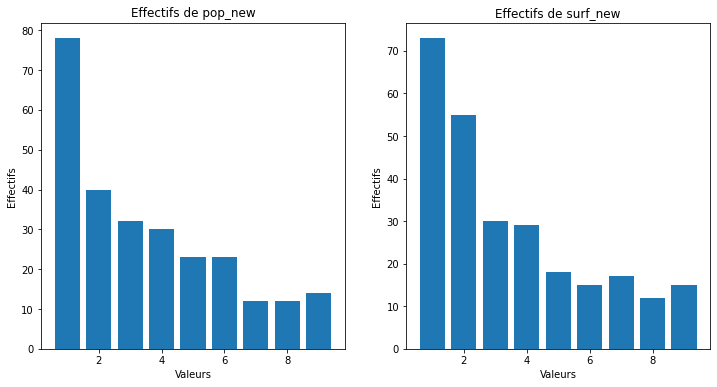

In [8]:
#table des effectifs pour pop_new
effectifs_pop = tidy_df['pop_new'].value_counts().sort_index()

#table des effectifs pour surf_new
effectifs_surf = tidy_df['surf_new'].value_counts().sort_index()

#les fréquences pour pop_new
freq_pop = effectifs_pop / effectifs_pop.sum()

#les fréquences pour surf_new
freq_surf = effectifs_surf / effectifs_surf.sum()

print("Table des effectifs pour pop_new")
print(effectifs_pop)
print("\nTable des effectifs pour surf_new")
print(effectifs_surf)

print("\nTable des fréquences pour pop_new")
print(freq_pop)
print("\nTable des fréquences pour surf_new")
print(freq_surf)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(effectifs_pop.index, effectifs_pop.values)
plt.title("Effectifs de pop_new")
plt.xlabel("Valeurs")
plt.ylabel("Effectifs")

plt.subplot(1, 2, 2)
plt.bar(effectifs_surf.index, effectifs_surf.values)
plt.title("Effectifs de surf_new")
plt.xlabel("Valeurs")
plt.ylabel("Effectifs")
plt.show()

#### Créer une liste de 9 valeurs où pour 1≤i≤9 la i-ème valeur de cette liste est égale à log10(1+1/i). Vérifier que l'on définit bien ainsi une loi de probabilité.

In [9]:
import numpy as np

# Créer une liste vide pour stocker les valeurs
liste_valeurs = []

# Calculer les valeurs selon la formule pour i de 1 à 9
for i in range(1, 10):
    valeur = np.log10(1 + 1/i)
    liste_valeurs.append(valeur)

# Afficher la liste des valeurs
print(liste_valeurs)

[0.3010299956639812, 0.17609125905568124, 0.12493873660829992, 0.09691001300805642, 0.07918124604762482, 0.06694678963061322, 0.05799194697768673, 0.05115252244738129, 0.04575749056067514]


##### Pour vérifier si cela définit bien une loi de probabilité, nous devons nous assurer que toutes les valeurs sont non négatives (car les probabilités sont toujours non négatives) et que la somme de toutes les valeurs est égale à 1

In [10]:
# Vérifier si toutes les valeurs sont non négatives
toutes_positives = all(valeur >= 0 for valeur in liste_valeurs)
print("Toutes les valeurs sont non négatives :", toutes_positives)

# Vérifier si la somme des valeurs est proche de 1
somme_valeurs = sum(liste_valeurs)
print("Somme des valeurs :", somme_valeurs)

Toutes les valeurs sont non négatives : True
Somme des valeurs : 1.0


#### Faire un test d'adéquation du khi-deux entre la variable définie à la question 5 et la loi de probabilité définie à la question 8 (formuler les hypothèses, mener le test à l'aide de la fonction 'chisquare' du module Scipy Stats puis conclure).

In [20]:
from scipy.stats import chisquare
import numpy as np

# Définition des fréquences observées
freq_obs= effectifs_pop
# Définition des fréquences attendues selon la loi de probabilité définie à la question 8
total_observations = sum(freq_obs)
freq_attendue = [prob * total_observations for prob in liste_valeurs]

#le test du chi-deux
stat_test, valeur_p = chisquare(freq_obs, f_exp=freq_attendue)

print("Chi-deux statistique :", stat_test)
print("P-valeur :", valeur_p)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if valeur_p < alpha:
    print("Nous rejetons l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Population' ne suit pas la loi de probabilité définie à la question 8.")
else:
    print("Nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Population' suit la loi de probabilité définie à la question 8.")

Chi-deux statistique : 4.7277633856617465
P-valeur : 0.7862373125027529
Nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Population' suit la loi de probabilité définie à la question 8.


#### Même question avec la variable de la question 6.

In [37]:
from scipy.stats import chisquare
import numpy as np

# Définir les fréquences observées
observed_frequencies = [len(tidy_df[tidy_df['surf_new'] == i]) for i in range(1, 10)]
print (observed_frequencies)
# Définir les fréquences attendues selon la loi de probabilité définie à la question 8
probabilities = [np.log10(1 + 1/i) for i in range(1, 10)]
total_observations = sum(observed_frequencies)
expected_frequencies = [prob * total_observations for prob in probabilities]

# Effectuer le test du chi-deux
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# Afficher les résultats
print("Chi-deux statistique :", chi2_stat)
print("P-valeur :", p_value)

# Interprétation des résultats
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Nous rejetons l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Surface' ne suit pas la loi de probabilité définie à la question 8.")
else:
    print("Nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Surface' suit la loi de probabilité définie à la question 8.")


[73, 55, 30, 29, 18, 15, 17, 12, 15]
Chi-deux statistique : 4.679456675246547
P-valeur : 0.7912221303112728
Nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle : La distribution des premiers chiffres significatifs de la variable 'Surface' suit la loi de probabilité définie à la question 8.


In [40]:
#les 1000 premiers termes de la suite 2n
suite1 = [2**n for n in range(1, 1001)]

#le premier chiffre significatif de chaque terme
var1 = [int(str(term)[0]) for term in suite1]

# les fréquences observées des premiers chiffres significatifs
freq_obs = [var1.count(digit) for digit in range(1, 10)]

# les fréquences attendues 
val_attendues = [value * sum(freq_obs) for value in liste_valeurs]

#le test du khi-deux
chi2_statistic, p_value = chisquare(freq_obs, f_exp=val_attendues)

print("Statistique du test du khi-deux :", chi2_statistic)
print("P-value :", p_value)

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("La distribution des premiers chiffres significatifs de la suite 2**n ne suit pas la loi de probabilité définie.")
else:
    print("La distribution des premiers chiffres significatifs de la suite 2**n suit la loi de probabilité définie.")


Statistique du test du khi-deux : 0.15855057629204392
P-value : 0.9999984553375978
La distribution des premiers chiffres significatifs de la suite 2**n suit la loi de probabilité définie.


In [41]:
import math
from scipy.stats import chisquare

# Fonction pour calculer la factorielle de n
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)

#les premiers termes de la suite n!
suite2 = [factorial(n) for n in range(1, 1001)]

#le premier chiffre significatif de chaque terme
var2 = [int(str(term)[0]) for term in suite2]

#les fréquences observées des premiers chiffres significatifs
freq_obs = [var2.count(digit) for digit in range(1, 10)]

#les fréquences attendues

val_attendues = [value * sum(freq_obs) for value in liste_valeurs]

# Effectuer le test du khi-deux
stat_test, valeur_p = chisquare(freq_obs, f_exp=val_attendues)

print("Statistique du test du khi-deux :", stat_test)
print("P-value :", valeur_p)

# Conclusion
alpha = 0.05
if valeur_p< alpha:
    print("La distribution des premiers chiffres significatifs de la suite n! ne suit pas la loi de probabilité définie.")
else:
    print("La distribution des premiers chiffres significatifs de la suite n! suit la loi de probabilité définie.")

Statistique du test du khi-deux : 8.681687370989536
P-value : 0.36985574497660767
La distribution des premiers chiffres significatifs de la suite n! suit la loi de probabilité définie.
